<a href="https://colab.research.google.com/github/coll-j/Parameterized-Match-Graph-Implementation/blob/main/PMG_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Reference:
https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/samehe-graphisomorphism.spire2013.pdf

# Test Cases

## Test 1

In [50]:
# Test Case 1
adjacency_matrix_a = {'A': ["", "e1", "", "", ""], # A
                      'B': ["e1", "", "e3", "e2", ""], # B
                      'C': ["", "e3", "", "e4,e5", ""], # C
                      'D': ["", "e2", "e4,e5", "", "e6"], # D
                      'E': ["", "", "", "e6", ""]} # E
                      # A B C D E
adjacency_matrix_b = {'F': ["", "e1_", "", "", ""], # F
                      'G': ["e1_", "", "e3_", "e2_", ""], # G
                      'H': ["", "e3_", "", "e4_,e5_", ""], # H
                      'I': ["", "e2_", "e4_,e5_", "", "e6_"], # I
                      'J': ["", "", "", "e6_", ""]} # J
                      # F G H I J

adjacency_matrix_a, adjacency_matrix_b

({'A': ['', 'e1', '', '', ''],
  'B': ['e1', '', 'e3', 'e2', ''],
  'C': ['', 'e3', '', 'e4,e5', ''],
  'D': ['', 'e2', 'e4,e5', '', 'e6'],
  'E': ['', '', '', 'e6', '']},
 {'F': ['', 'e1_', '', '', ''],
  'G': ['e1_', '', 'e3_', 'e2_', ''],
  'H': ['', 'e3_', '', 'e4_,e5_', ''],
  'I': ['', 'e2_', 'e4_,e5_', '', 'e6_'],
  'J': ['', '', '', 'e6_', '']})

## Test 2

In [147]:
# Test Case 2
adjacency_matrix_a = {'A': ["", "e1", "", "", "e7"], # A
                      'B': ["e1", "", "e3", "e2", ""], # B
                      'C': ["", "e3", "", "e4,e5", ""], # C
                      'D': ["", "e2", "e4,e5", "", "e6"], # D
                      'E': ["e7", "", "", "e6", ""]} # E
                      # A B C D E
adjacency_matrix_b = {'F': ["", "e1_", "", "", ""], # F
                      'G': ["e1_", "", "e3_", "e2_", ""], # G
                      'H': ["", "e3_", "", "e4_,e5_", ""], # H
                      'I': ["", "e2_", "e4_,e5_", "", "e6_"], # I
                      'J': ["", "", "", "e6_", ""]} # J
                      # F G H I J

adjacency_matrix_a, adjacency_matrix_b

({'A': ['', 'e1', '', '', 'e7'],
  'B': ['e1', '', 'e3', 'e2', ''],
  'C': ['', 'e3', '', 'e4,e5', ''],
  'D': ['', 'e2', 'e4,e5', '', 'e6'],
  'E': ['e7', '', '', 'e6', '']},
 {'F': ['', 'e1_', '', '', ''],
  'G': ['e1_', '', 'e3_', 'e2_', ''],
  'H': ['', 'e3_', '', 'e4_,e5_', ''],
  'I': ['', 'e2_', 'e4_,e5_', '', 'e6_'],
  'J': ['', '', '', 'e6_', '']})

## Test 3

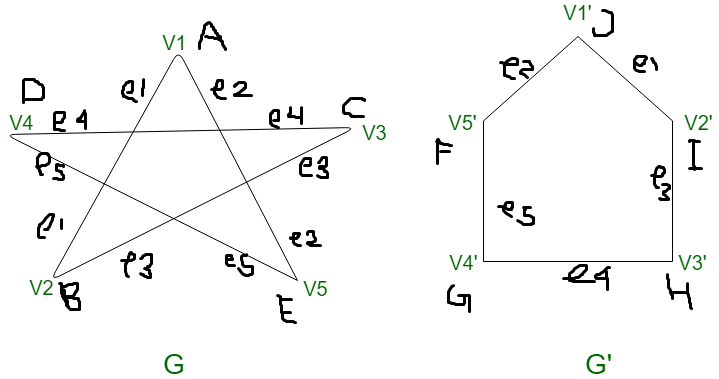

In [41]:
# Test Case 3
adjacency_matrix_a = {'A': ["", "e1", "", "", "e2"], # A - V1
                      'B': ["e1", "", "e3", "", ""], # B - V2
                      'C': ["", "e3", "", "e4", ""], # C - V3
                      'D': ["", "", "e4", "", "e5"], # D - V4
                      'E': ["e2", "", "", "e5", ""]} # E - V5
                      # A B C D E
adjacency_matrix_b = {'F': ["e2_", "", "", "e5_", ""], # F - V5'
                      'G': ["", "", "e4_", "", "e5_"], # G - V4'
                      'H': ["", "e3_", "", "e4_", ""], # H - V3'
                      'I': ["e1_", "", "e3_", "", ""], # I - V2'
                      'J': ["", "e1_", "", "", "e2_"]} # J - V1'
                      # J I H G F

adjacency_matrix_a, adjacency_matrix_b

({'A': ['', 'e1', '', '', 'e2'],
  'B': ['e1', '', 'e3', '', ''],
  'C': ['', 'e3', '', 'e4', ''],
  'D': ['', '', 'e4', '', 'e5'],
  'E': ['e2', '', '', 'e5', '']},
 {'F': ['e2_', '', '', 'e5_', ''],
  'G': ['', '', 'e4_', '', 'e5_'],
  'H': ['', 'e3_', '', 'e4_', ''],
  'I': ['e1_', '', 'e3_', '', ''],
  'J': ['', 'e1_', '', '', 'e2_']})

# Method Functions

## Helper

In [45]:
def findPair(adjacency_matrix, vertex, edge):
  """
  Mencari pasangan vertex dalam suatu graf berdasarkan edge yang menghubungkan

  Input:
  adjacency_matrix -> list; representasi matrix dari graf berukuran NxN
  vertex -> string; vertex yang ingin dicari pasangannya
  edge -> string; edge yang menghubungkan

  Output:
  v -> vertex pasangan
  """
  for v in [v for v in adjacency_matrix.keys() if v != vertex]:
    for edges in adjacency_matrix[v]:
      # print('v e', v, e)
      for e in edges.split(","):
        if e == edge:
          return v

In [46]:
def parseEdgePair(adjacency_matrix):
  """
  Mendapatkan edge pada setiap vertex beserta vertex pasangannya

  Input:
  adjacency_matrix -> list; representasi matrix dari graf berukuran NxN

  Output:
  edge_pair -> dictionary; berisi setiap vertex sebagai key dan 
  value berupa dict dengan key adalah edge dan value adalah vertex pasangannya
  """
  edge_pair = {}
  for i in adjacency_matrix.keys():
    for j in range(len(adjacency_matrix)):
      if len(adjacency_matrix[i][j]) > 0: # bukan empty string, ada edge
        _edges = adjacency_matrix[i][j].split(',')
        for _edge in _edges:
          if i not in edge_pair:
            edge_pair[i] = {} # inisialisasi dict kalau vertex belom ada di dict
          edge_pair[i][_edge] = findPair(adjacency_matrix, i, _edge)

  return edge_pair

In [47]:
def count_degree(list_of_edges):
  """
  Menghitung derajat dari sebuah vertex

  Input:
  list_of_edges -> list; edge yang terhubung pada vertex tersebut

  Output:
  len(non_empty) -> int; jumlah edge yang terhubung pada vertex
  """
  non_empty = []
  for v in list_of_edges:
    if len(v) > 0:
      for e in v.split(','):
        non_empty.append(e)
  return len(non_empty)

## GLA (Graph Linearization Algorithm)

In [48]:
def TraverseGraph(edges_flag, vertices_flag, edge_pair, vertex, p, unexplGE):
  """
  Fungsi rekursif pembantu untuk GLA. 
  Fungsi ini akan traverse (melintasi) ke seluruh elemen graf

  Input:
  edges_flag -> dictionary; berisi flag edge sudah dikunjungi atau belum
  vertices_flag -> dictionary; berisi flag dan jumlah edge dari vertex yang belum dikunjungi
  edge_pair -> dictionary; berisi vertex dengan edge dan pasangannya
  vertex -> string; vertex yang sedang dikunjungi
  p -> list; walk linearisasi dari graf
  unexplGE -> int; jumlah edge dan vertex yang belum dikunjungi

  Output:
  unexplGE -> int; jumlah edge dan vertex yang belum dikunjungi
  """
  p.append(vertex)
  vertices_flag[vertex]['explored'] = True
  unexplGE -= 1
  for _edge in edge_pair[vertex]:
    _v2 = edge_pair[vertex][_edge]
    if not edges_flag[_edge] and vertices_flag[_v2]['explored']: # jika edge mengarah ke vertex yang sudah dikunjungi
      p.append(_edge)
      edges_flag[_edge] = True
      vertices_flag[vertex]['num_unexplored_edges'] -= 1
      vertices_flag[edge_pair[vertex][_edge]]['num_unexplored_edges'] -= 1
      unexplGE = TraverseGraph(edges_flag, vertices_flag, edge_pair, edge_pair[vertex][_edge], p, unexplGE)

      if unexplGE > 0:
        p.append(_edge)
        p.append(vertex)

  # untuk edge yg mengarah ke vertex yg belum dikunjungi, 
  # diurutkan dai edge yang menghubungkan
  # vertex yang memiliki jumlah edge belum dikunjungi paling sedikit
  while vertices_flag[vertex]['num_unexplored_edges'] > 0: 
    _edge = min([i for i in edge_pair[vertex].keys() if edges_flag[i] == False ], 
                key=(lambda k: vertices_flag[edge_pair[vertex][k]]['num_unexplored_edges']))
    p.append(_edge)
    edges_flag[_edge] = True
    unexplGE -= 1
    vertices_flag[vertex]['num_unexplored_edges'] -= 1
    vertices_flag[edge_pair[vertex][_edge]]['num_unexplored_edges'] -= 1
    unexplGE = TraverseGraph(edges_flag, vertices_flag, edge_pair, edge_pair[vertex][_edge], p, unexplGE)
    if unexplGE <= 0:
      break
  return unexplGE

In [56]:
def GLA(adjacency_matrix):
  """
  Linearisasi graf

  Input:
  adjacency_matrix -> list; representasi matrix dari graf berukuran NxN

  Output:
  p -> list; walk linearisasi dari graf
  """
  edges_flag = {} # Flag edge sudah dikunjungi atau belum -> {ket_edge: boolean}

  vertices_flag = {} # Flag vertice sudah dikunjungi atau belum, dict of dict -> {key_vertex: {explored: boolean, num_unexplored_edges: int}}
  for _vertex in adjacency_matrix.keys():
    vertices_flag[_vertex] = {'explored': False, 'num_unexplored_edges': 0}


  edge_pair = parseEdgePair(adjacency_matrix)
  for i in edge_pair:
    vertices_flag[i]['num_unexplored_edges'] = len(edge_pair[i]) # menyimpan jumlah edge yang belum dikunjungi
    for j in edge_pair[i]:
      edges_flag[j] = False

  init_vertex = min(vertices_flag.keys(), key=(lambda k: vertices_flag[k]['num_unexplored_edges'])) # Ambil vertex dengan degree terkecil

  p = [] # inisialisasi p
  unexplGE = len(adjacency_matrix) + len(edges_flag)
  TraverseGraph(edges_flag, vertices_flag, edge_pair, init_vertex, p, unexplGE)
  return p

## PMG (Parameterized Matching on multi-Graph)

In [60]:
def ExtendMatch(vertex, p, p_index, f_ge, g_ge, edge_pair_1, edge_pair_2):
  """
  Fungsi rekursif pembantu untuk melanjutkan pencocokan graf

  Input:
  vertex -> string; vertex dari graf yang telah dicocokkan
  p -> list; walk linearisasi graf pertama
  p_index -> int; index p yang saat ini dicocokkan
  f_ge -> dictionary; hasil pencocokan graf kedua dengan graf pertama
  g_ge -> dictionary; flag apakah vertex atau edge graf kedua sudah dicocokkan
  edge_pair_1 -> dictionary; pasangan edge vertex graf pertama
  edge_pair_2 -> dictionary; pasangan edge vertex graf kedua

  Output:
  True jika kedua graf isomorfik. False jika tidak.
  f_ge_ -> dictionary; hasil pencocokan graf kedua dengan graf pertama
  """
  if p_index >= len(p)-1: # base case
    return True, f_ge
  p_next_edge = p[p_index+1] # edge selanjutnya dari walk
  p_next_vertex = p[p_index+2] # vertex selanjutnya dari walk
  if f_ge[p_next_vertex] is None:
    for edge in edge_pair_2[vertex]:
      vertex_pair = edge_pair_2[vertex][edge]
      if g_ge[vertex_pair] == False and g_ge[edge] == False \
        and (count_degree(edge_pair_2[vertex_pair]) == count_degree (edge_pair_1[p_next_vertex])): # jika vertex dan edge pada graf kedua belum dipasangkan
        f_ge_ = f_ge.copy()
        g_ge_ = g_ge.copy()

        f_ge_[p_next_edge] = edge
        f_ge_[p_next_vertex] = vertex_pair
        g_ge_[edge] = True
        g_ge_[vertex_pair] = True

        flag, f_ge_ =  ExtendMatch(vertex_pair, p, p_index + 2, f_ge_, g_ge_, edge_pair_1, edge_pair_2)
        if flag:
          return True, f_ge_
  else: # jika vertex selanjutnya sudah dipasangkan
    vertex_pair = f_ge[p_next_vertex]
    if f_ge[p_next_edge] is None:
      for edge in [i for i in edge_pair_2[vertex] if edge_pair_2[vertex][i] == vertex_pair and g_ge[i] == False]:
        f_ge_ = f_ge.copy()
        g_ge_ = g_ge.copy()

        f_ge_[p_next_edge] = edge
        g_ge_[edge] = True

        flag, f_ge_ = ExtendMatch(vertex_pair, p, p_index + 2, f_ge_, g_ge_, edge_pair_1, edge_pair_2)
        if flag:
          return True, f_ge_
    else: # jika edge selanjutnya sudah dipasangkan
      flag, f_ge_ = ExtendMatch(vertex_pair, p, p_index + 2, f_ge, g_ge, edge_pair_1, edge_pair_2)
      if flag:
        return True, f_ge_
  return False, None

In [61]:
def PMG(adjacency_matrix_1, adjacency_matrix_2):
  """
  Mencocokkan parameter (elemen) pada kedua elemen

  Output:
  True jika kedua graf isomorfik. False jika tidak.
  f_ge_ -> dictionary; hasil pencocokan graf kedua dengan graf pertama
  """
  p = GLA(adjacency_matrix_1)
  f_ge = {} # {edge_atau_vertex_1: edge_atau_vertex_2}
  g_ge = {} # {edge_atau_vertex_2: boolean}
  edge_pair_1 = parseEdgePair(adjacency_matrix_1)
  edge_pair_2 = parseEdgePair(adjacency_matrix_2)
  for ge in p:
    f_ge[ge] = None
  for v in adjacency_matrix_2.keys():
    g_ge[v] = False
    for _e in adjacency_matrix_2[v]:
      if len(_e) > 0:
        for e in _e.split(','):
          g_ge[e] =  False

  for vertex_2 in adjacency_matrix_2.keys():
    if count_degree(adjacency_matrix_2[vertex_2]) == count_degree(adjacency_matrix_1[p[0]]): # jika derajat pada vertex pertama kedua graf sama
      f_ge_ = f_ge.copy()
      g_ge_ = g_ge.copy()

      f_ge_[p[0]] = vertex_2
      g_ge_[vertex_2] = True
      flag, f_ge_ = ExtendMatch(vertex_2, p, 0, f_ge_, g_ge_, edge_pair_1, edge_pair_2)
      if flag:
        return True, f_ge_
  return False, None

# Testing

In [55]:
linearized_graph = GLA(adjacency_matrix_a)
'->'.join(linearized_graph), len(linearized_graph)

{'A': {'e1': 'B'}, 'B': {'e1': 'A', 'e3': 'C', 'e2': 'D'}, 'C': {'e3': 'B', 'e4': 'D', 'e5': 'D'}, 'D': {'e2': 'B', 'e4': 'C', 'e5': 'C', 'e6': 'E'}, 'E': {'e6': 'D'}}
{'e1': False, 'e3': False, 'e2': False, 'e4': False, 'e5': False, 'e6': False}
{'A': {'explored': False, 'num_unexplored_edges': 1}, 'B': {'explored': False, 'num_unexplored_edges': 3}, 'C': {'explored': False, 'num_unexplored_edges': 3}, 'D': {'explored': False, 'num_unexplored_edges': 4}, 'E': {'explored': False, 'num_unexplored_edges': 1}}


('A->e1->B->e3->C->e4->D->e2->B->e2->D->e5->C->e5->D->e6->E', 17)

In [37]:
linearized_graph = GLA(adjacency_matrix_b)
'->'.join(linearized_graph), len(linearized_graph)

('F->e1_->G->e3_->H->e4_->I->e2_->G->e2_->I->e5_->H->e5_->I->e6_->J', 17)

In [57]:
PMG(adjacency_matrix_a, adjacency_matrix_b)

(True,
 {'A': 'F',
  'B': 'G',
  'C': 'H',
  'D': 'I',
  'E': 'J',
  'e1': 'e1_',
  'e2': 'e2_',
  'e3': 'e3_',
  'e4': 'e4_',
  'e5': 'e5_',
  'e6': 'e6_'})